In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('NewspaperData.csv')
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.shape

(34, 3)

In [4]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [5]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

Hypothesis Ho: sunday sell is not related to daily sell

Ha: sunday sell is related to daily sell

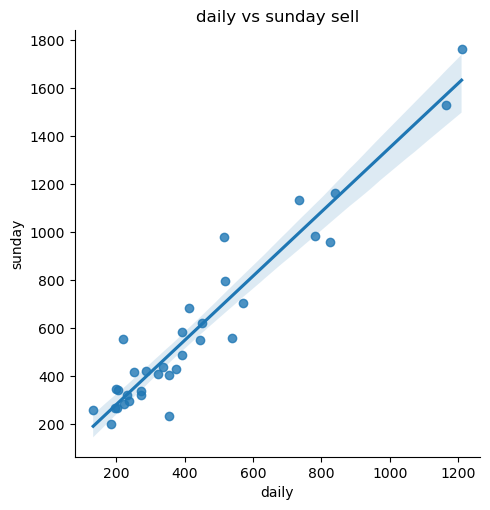

In [7]:
import seaborn as sns

sns.lmplot(x = 'daily', y = 'sunday', data = data)
plt.title("daily vs sunday sell")
plt.show()

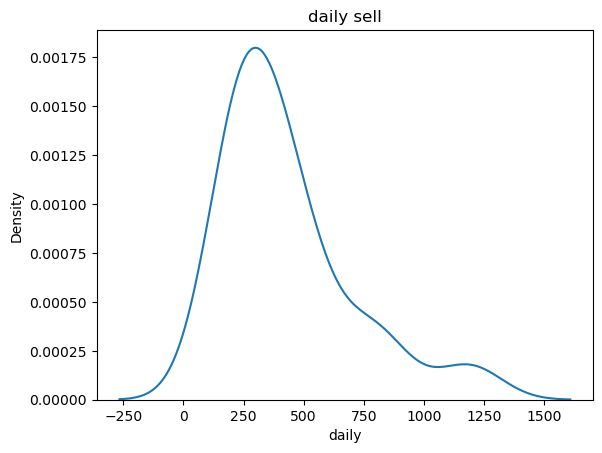

In [8]:
sns.distplot(a = data['daily'], hist = False)
plt.title("daily sell")
plt.show()

In [9]:
data['daily'].skew()

1.5321591323040094

In [10]:
data['daily'].kurtosis()

1.999034084097406

In [11]:
data1 = data.drop(labels = 'Newspaper', axis = 1)
data1

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [12]:
import statsmodels.formula.api as smf

linear_model = smf.ols(formula = 'sunday~daily', data = data1)

In [13]:
linear_model = linear_model.fit()

In [14]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [15]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           6.02e-19
Time:                        20:38:13   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_test = pd.DataFrame(data = {'daily' : [300, 250, 585]})
x_test

,daily
0,300
1,250
2,585


In [17]:
linear_model.predict(x_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64

In [18]:
from pickle import dump
dump(linear_model, open('linear_intelligence.pkl', 'wb'))

In [19]:
from pickle import load
load_linear_model = load(open('linear_intelligence.pkl', 'rb'))

In [20]:
load_linear_model.predict(x_test)

0    415.750057
1    348.764319
2    797.568763
dtype: float64